In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load processed data
merged_df = pd.read_csv('E:\Python\Credit_Card_Financial_PBI\data\processed\merged_data.csv')

# Drop the 'Transaction_ID' column
merged_df.drop(columns=['Transaction_ID'], inplace=True)

# Convert 'Week_Num' to numerical format
# Extract the week number from strings like 'Week-44'
merged_df['Week_Num'] = merged_df['Week_Num'].str.extract('(\d+)').astype(int)

# Encode 'Qtr' column 
merged_df['Qtr'] = merged_df['Qtr'].str.extract('(\d+)').astype(int)

# Encode 'Gender' column 
merged_df['Gender'] = merged_df['Gender'].map({'F': 0, 'M': 1})

# List of categorical columns to encode
categorical_columns = [
    'Education_Level',  
    'Marital_Status',   
    'state_cd',         
    'Customer_Job',     
    'Card_Category',    
    'Exp Type',         
    'Use Chip'          
]

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    if col in merged_df.columns:
        le = LabelEncoder()
        merged_df[col] = le.fit_transform(merged_df[col])
        label_encoders[col] = le  

# Save the fully encoded dataset
merged_df.to_csv('E:\Python\Credit_Card_Financial_PBI\data\processed\encoded_data.csv', index=False)

print("All categorical columns have been encoded and saved to 'encoded_data.csv'.")

All categorical columns have been encoded and saved to 'encoded_data.csv'.


In [2]:
# Load the dataset
merged_df = pd.read_csv('E:\Python\Credit_Card_Financial_PBI\data\processed\encoded_data.csv')

# Encode binary categorical columns 
binary_columns = ['Car_Owner', 'House_Owner', 'Personal_loan']
for col in binary_columns:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].map({'yes': 1, 'no': 0})
        
# Encode 'contact' column 
if 'contact' in merged_df.columns:
    merged_df['contact'] = merged_df['contact'].map({'cellular': 0, 'telephone': 1})
    
# Encode 'Utilization_Ratio_Bucket' column 
if 'Utilization_Ratio_Bucket' in merged_df.columns:
    merged_df['Utilization_Ratio_Bucket'] = merged_df['Utilization_Ratio_Bucket'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Save the fully encoded dataset
merged_df.to_csv('E:\Python\Credit_Card_Financial_PBI\data\processed\encoded_data.csv', index=False)

print("All remaining categorical columns have been encoded and saved to 'fully_encoded_data.csv'.")

All remaining categorical columns have been encoded and saved to 'fully_encoded_data.csv'.


In [3]:
# Check for missing values
print("Missing values in the dataset:")
print(merged_df.isnull().sum())

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(merged_df.isnull().sum())

# Save the cleaned dataset
merged_df.to_csv('E:\Python\Credit_Card_Financial_PBI\data\processed\cleaned_data.csv', index=False)

print("Missing values have been handled and saved to 'cleaned_data.csv'.")

Missing values in the dataset:
Client_Num                     0
Annual_Fees                    0
Activation_30_Days             0
Customer_Acq_Cost              0
Week_Start_Date                0
Week_Num                       0
Qtr                            0
current_year                   0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Trans_Amt                0
Total_Trans_Vol                0
Avg_Utilization_Ratio          0
Interest_Earned                0
Delinquent_Acc                 0
Customer_Age                   0
Gender                         0
Dependent_Count                0
Education_Level                0
Marital_Status                 0
state_cd                       0
Zipcode                        0
Car_Owner                      0
House_Owner                    0
Personal_loan                  0
contact                     1947
Customer_Job                   0
Income                         0
Cust_Satisfaction_Score        0
Net_Profit_p

In [4]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import joblib
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
merged_df = pd.read_csv(r'E:\Python\Credit_Card_Financial_PBI\data\processed\cleaned_data.csv')

# Display the first few rows of the dataset
print("Cleaned Dataset:")
print(merged_df.head())

# Verify that there are no missing values
print("\nMissing values in the cleaned dataset:")
print(merged_df.isnull().sum())


Cleaned Dataset:
   Client_Num  Annual_Fees  Activation_30_Days  Customer_Acq_Cost  \
0   708082083          200                   0                 87   
1   708083283          445                   1                108   
2   708084558          140                   0                106   
3   708085458          250                   1                150   
4   708086958          320                   1                106   

  Week_Start_Date  Week_Num  Qtr  current_year  Credit_Limit  \
0      01-01-2023         1    1          2023     -0.559971   
1      01-01-2023         1    1          2023     -0.573499   
2      01-01-2023         1    1          2023     -0.041533   
3      01-01-2023         1    1          2023     -0.791553   
4      01-01-2023         1    1          2023     -0.605722   

   Total_Revolving_Bal  ...  Card_Category_Gold  Card_Category_Platinum  \
0             0.611208  ...               False                   False   
1             1.661359  ...      

In [5]:
# Prepare features and target for CLV prediction
X_clv = merged_df.drop(columns=['Net_Profit_per_Customer', 'Week_Start_Date', 'Client_Num'])
y_clv = merged_df['Net_Profit_per_Customer']


In [6]:
# Train-test split for CLV prediction
X_train_clv, X_test_clv, y_train_clv, y_test_clv = train_test_split(X_clv, y_clv, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor for CLV prediction
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_clv, y_train_clv)

GradientBoostingRegressor(random_state=42)

In [9]:
# Evaluate CLV model
y_pred_clv = gbr.predict(X_test_clv)
print("CLV Prediction Performance:")
print(f"RMSE: {mean_squared_error(y_test_clv, y_pred_clv, squared=False)}")
print(f"R-squared: {r2_score(y_test_clv, y_pred_clv)}")

# Save CLV model
joblib.dump(gbr, r'E:\Python\Credit_Card_Financial_PBI\models\clv_model.pkl')

CLV Prediction Performance:
RMSE: 16.308080295498872
R-squared: 0.9994900369416387


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['E:\\Python\\Credit_Card_Financial_PBI\\models\\clv_model.pkl']

In [10]:
# Prepare features and target for churn prediction
merged_df['Churn'] = (merged_df['Total_Trans_Amt'] == 0).astype(int)
X_churn = merged_df.drop(columns=['Churn', 'Week_Start_Date', 'Client_Num'])
y_churn = merged_df['Churn']

In [11]:
# Train-test split for churn prediction
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)

# Train XGBoost Classifier for churn prediction
xgb_churn = XGBClassifier(random_state=42)
xgb_churn.fit(X_train_churn, y_train_churn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [13]:
# Evaluate churn model
y_pred_churn = xgb_churn.predict(X_test_churn)
print("Churn Prediction Performance:")
print(classification_report(y_test_churn, y_pred_churn))

# Save churn model
joblib.dump(xgb_churn, r'E:\Python\Credit_Card_Financial_PBI\models\churn_model.pkl')

Churn Prediction Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2022

    accuracy                           1.00      2022
   macro avg       1.00      1.00      1.00      2022
weighted avg       1.00      1.00      1.00      2022



['E:\\Python\\Credit_Card_Financial_PBI\\models\\churn_model.pkl']

In [14]:
# Prepare features and target for delinquency risk prediction
X_delinquency = merged_df.drop(columns=['Delinquent_Acc', 'Week_Start_Date', 'Client_Num'])
y_delinquency = merged_df['Delinquent_Acc']


In [15]:
# Train-test split for delinquency risk prediction
X_train_delinquency, X_test_delinquency, y_train_delinquency, y_test_delinquency = train_test_split(
    X_delinquency, y_delinquency, test_size=0.2, random_state=42
)

# Train Random Forest Classifier for delinquency risk prediction
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_delinquency, y_train_delinquency)

RandomForestClassifier(random_state=42)

In [16]:
# Evaluate delinquency risk model
y_pred_delinquency = rf.predict(X_test_delinquency)
print("Delinquency Risk Prediction Performance:")
print(classification_report(y_test_delinquency, y_pred_delinquency))

# Save delinquency risk model
joblib.dump(rf, r'E:\Python\Credit_Card_Financial_PBI\models\delinquency_model.pkl')

Delinquency Risk Prediction Performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1897
           1       0.00      0.00      0.00       125

    accuracy                           0.94      2022
   macro avg       0.47      0.50      0.48      2022
weighted avg       0.88      0.94      0.91      2022



C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

['E:\\Python\\Credit_Card_Financial_PBI\\models\\delinquency_model.pkl']

<Figure size 640x480 with 0 Axes>

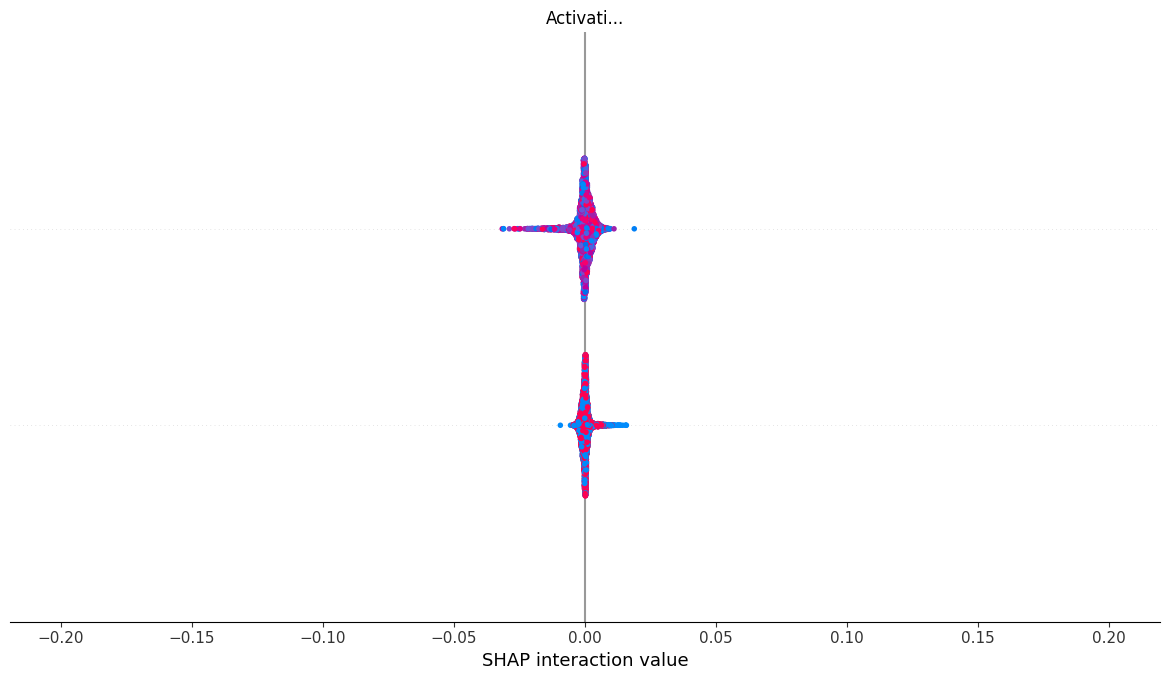

In [17]:
# SHAP explainability for delinquency risk model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_delinquency)
shap.summary_plot(shap_values, X_train_delinquency, plot_type="bar", show=False)
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\reports\delinquency_risk_shap.png')
plt.show()

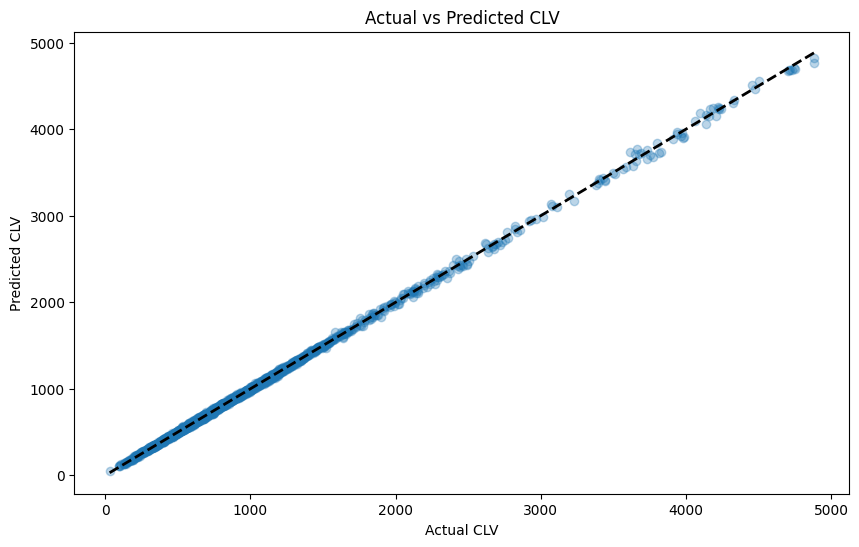

In [18]:
# Visualize CLV predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clv, y_pred_clv, alpha=0.3)
plt.plot([y_test_clv.min(), y_test_clv.max()], [y_test_clv.min(), y_test_clv.max()], 'k--', lw=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted CLV')
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\reports\clv_prediction_insights.png')
plt.show()

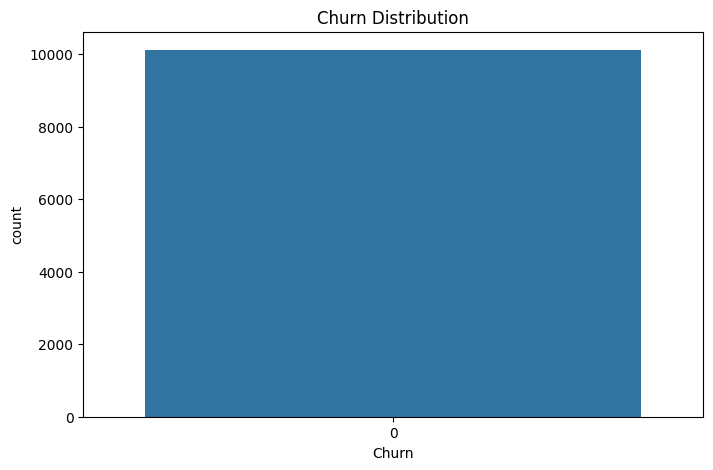

In [19]:
# Visualize churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=merged_df)
plt.title('Churn Distribution')
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\reports\churn_prediction_insights.png')
plt.show()